# 04. Seaborn

### Objectives
* Seaborn makes beautiful plots with concise syntax
* Seaborn (mostly) requires tidy data
* Seaborn integrates directly with pandas DataFrames
* Use matplotlib for customized plots
* Know how to use pandas **`plot`** method to easily make plots
* Seaborn has two broad types of plots: axes (simple) and grid (complex and composed of multiple axes plot)
* Know the difference between categorical and regression variables and plots
* Know how to add dimensionality with **hue, col, row** seaborn plotting parameters

### Prepare for this lesson
* Visit the [seaborn home page](http://seaborn.pydata.org/index.htm) and read the [introduction](http://seaborn.pydata.org/introduction.html#introduction)
* Reference the [seaborn tutorial](http://seaborn.pydata.org/tutorial.html) which has excellent documentation on how to use all of the seaborn plotting functions.
* Keep the [Seaborn API page](http://seaborn.pydata.org/api.html) open throughout the notebook
* Read the [pandas visualization docs](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

### Objectives


This notebook will dive into the Seaborn visualization library in Python. This notebook assumes no previous visualization knowledge.

The [Python Seaborn library](http://seaborn.pydata.org/index.html) is a high-level, easy-to-use interface for creating powerful and beautiful visualizations. Seaborn does not actually perform any of the visualizations but instead, calls the primary Python visualization library, matplotlib, to do all the heavy lifting. Sometimes, Seaborn is referred to as a **wrapper** for matplotlib, which is a more difficult library to use but provides more fine-grained control.

The Seaborn documentation is excellent and you well be well-served to read all of it. The library is fairly minimal and only exposes a relatively few amount of functions. I suggest you start with plotting sections of the [seaborn tutorial](http://seaborn.pydata.org/tutorial.html#). The tutorial separates out the plotting functions into three separate sections - distributions, linear relationships, and categorical data.

## Seaborn integration with Pandas
All Seaborn plotting functions contain a **`data`** parameter that accepts a pandas DataFrame. This allows you to use the **string names** of the column names for the other arguments in the plotting functions.

## Seaborn and Tidy data
Seaborn plotting functions work best with tidy data. Tidy data makes plotting with seaborn incredibly easy.

## The four common Seaborn plotting function parameters - `x`, `y`, `hue`, and `data`
The Seaborn API is easy to use and most of the plotting functions look very similar. They syntax will look like this:

```sns.plotting_func(x='col1', y='col2', hue='col3', data=df)```

You will always pass your DataFrame to the `data` parameter. For the univariate plot, you can use exactly one of `x` and `y`. The `hue` parameter adds an extra level of dimensionality by splitting and coloring the data by a third variable. For 

## Getting started with Axes plots for Univariate visualization
Let's begin by making plots with a single dimension of data.

[1]: http://seaborn.pydata.org/api.html

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
emp = pd.read_csv('../data/employee.csv', parse_dates=['hire_date', 'job_date'])
emp['experience'] = 2016 - emp['hire_date'].dt.year
emp.head()

title                           dept    salary  \
0  ASSISTANT DIRECTOR (EX LVL)    Municipal Courts Department  121862.0   
1            LIBRARY ASSISTANT                        Library   26125.0   
2               POLICE OFFICER  Houston Police Department-HPD   45279.0   
3            ENGINEER/OPERATOR  Houston Fire Department (HFD)   63166.0   
4                  ELECTRICIAN    General Services Department   56347.0   

       race  gender  hire_date   job_date  experience  
0  Hispanic  Female 2006-06-12 2012-10-13          10  
1  Hispanic  Female 2000-07-19 2010-09-18          16  
2     White    Male 2015-02-03 2015-02-03           1  
3     White    Male 1982-02-08 1991-05-25          34  
4     White    Male 1989-06-19 1994-10-22          27

In [80]:
emp['experience_level'] = pd.cut(emp['experience'], 
                                 bins=[0, 5, 15, 100], 
                                 labels=['Novice', 'Experienced', 'Veteran'])
# work on numeric columns and chop it up into bins, here 3 categories [), similar to age
# if put 5, then create 5 equally space bins
emp.head()

title                           dept    salary  \
0  ASSISTANT DIRECTOR (EX LVL)    Municipal Courts Department  121862.0   
1            LIBRARY ASSISTANT                        Library   26125.0   
2               POLICE OFFICER  Houston Police Department-HPD   45279.0   
3            ENGINEER/OPERATOR  Houston Fire Department (HFD)   63166.0   
4                  ELECTRICIAN    General Services Department   56347.0   

       race  gender  hire_date   job_date  experience experience_level  
0  Hispanic  Female 2006-06-12 2012-10-13          10      Experienced  
1  Hispanic  Female 2000-07-19 2010-09-18          16          Veteran  
2     White    Male 2015-02-03 2015-02-03           1           Novice  
3     White    Male 1982-02-08 1991-05-25          34          Veteran  
4     White    Male 1989-06-19 1994-10-22          27          Veteran

### Univariate numerical plots
A few of the plots work with just a single dimension of data. Pass the DataFrame to the **`data`** parameter. Let's create a boxplot. Most Seaborn methods have both an **`x`** and **`y`** parameter. For some plots you only need to specify one of them.

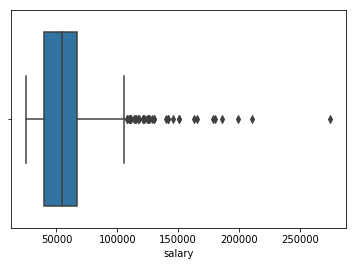

In [81]:
sns.boxplot(x='salary', data=emp) # only for numeric variables

Make the boxplot vertical by passing using **`y`**.

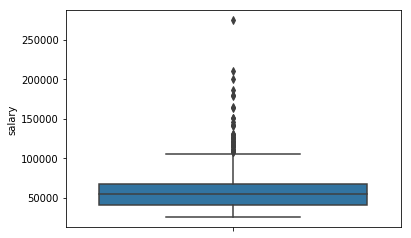

In [82]:
sns.boxplot(y='salary', data=emp)

### Violin plot
Violin plots help you visualize a distribution and work with just single dimensions of data.

/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


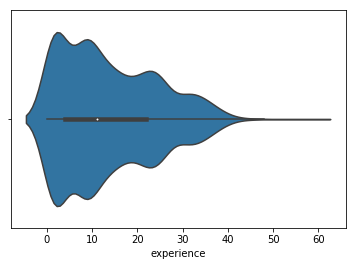

In [83]:
sns.violinplot('experience', data=emp) #similar to boxplot,kde plot and mirror on the other side
# could do split, compare female and male dist

### String Data
String data cannot be visualized with the above plots. We can assign the returned matplotlib Axes to a variable and then modify our plot. This is doing the same thing as `emp['race'].value_counts()` in Pandas.

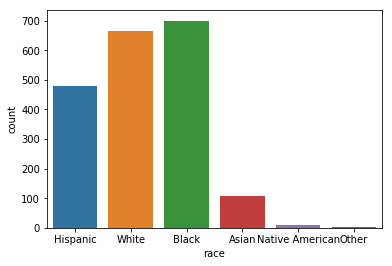

In [84]:
ax = sns.countplot('race', data=emp)

In [85]:
ax.set_title('RACE COUNT')

Text(0.5,1,'RACE COUNT')

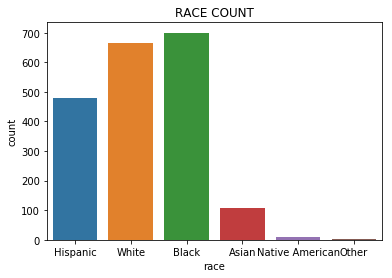

In [86]:
ax.figure

Seaborn plots return the underlying axes. We can assign this returned object to a variable and use it to modify our plots.

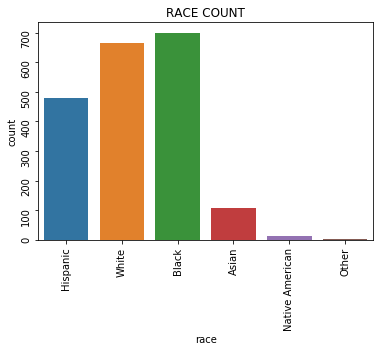

In [87]:
ax.tick_params(rotation=90)
ax.figure

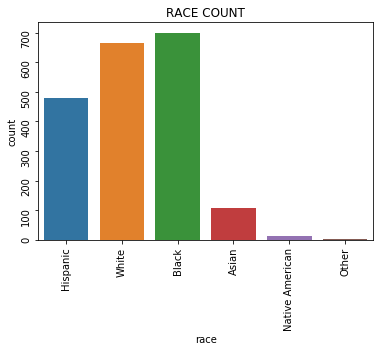

In [88]:
ax.tick_params(axis = 'x', rotation=90)
ax.figure

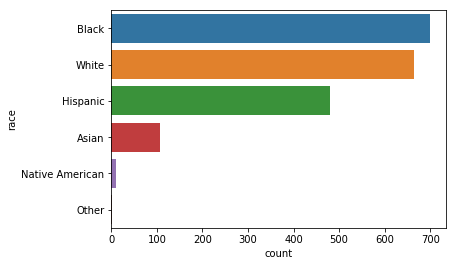

In [89]:
idx = emp['race'].value_counts().index
ax = sns.countplot(y='race', data=emp, order=idx)


### KDE and Histogram
The **`distplot`** function plots both the KDE and the histogram together. There is no **`data`** parameter here, so you must pass in the Series directly.

/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


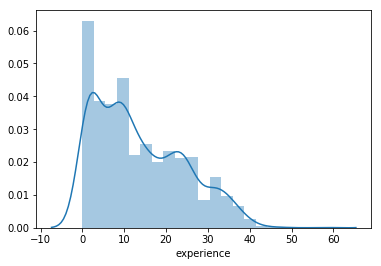

In [90]:
sns.distplot(emp['experience'])

/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


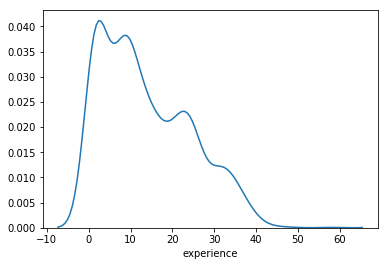

In [91]:
sns.distplot(emp['experience'], hist = False)

# Multivariate plotting
The above plots all contained a single plot. We will add another dimension to our data by using both `x` and `y` parameters.

### Mixing a categorical feature
All the plots below use one categorical column and one numeric column. Seaborn **aggregates** the data for us. Let's find the average salary by gender using many different plots.

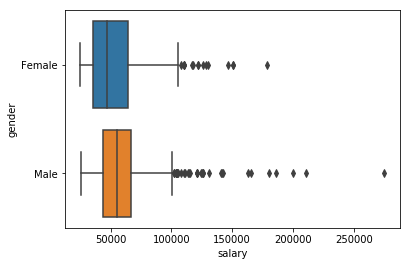

In [92]:
sns.boxplot(x='salary', y='gender', data=emp)

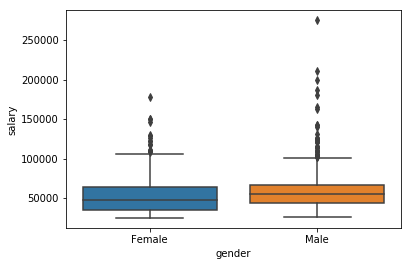

In [93]:
sns.boxplot(x='gender', y='salary', data=emp) #switch x and y to change orientation

/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


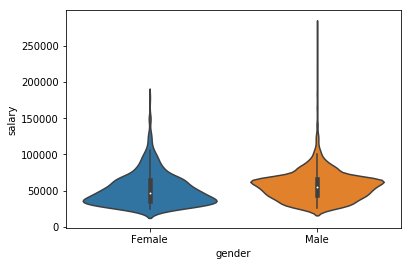

In [94]:
sns.violinplot(x='gender', y='salary', data=emp)

By default, the bar plot takes the average

/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


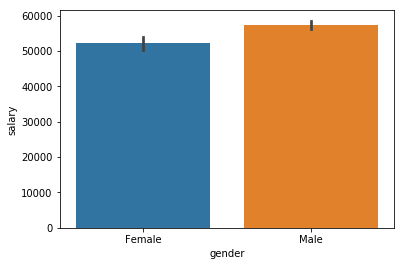

In [95]:
sns.barplot(x='gender', y='salary', data=emp) #default is average of the numeric vairable
# black line is the confidence interval

Can change aggregation but Seaborn does not accept strings. Must use NumPy.

/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


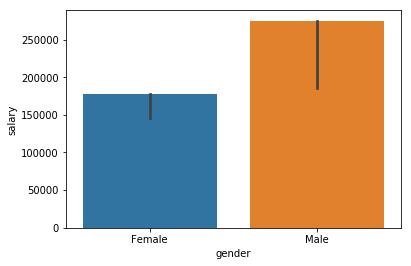

In [96]:
sns.barplot(x='gender', y='salary', data=emp, estimator=np.max)

/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


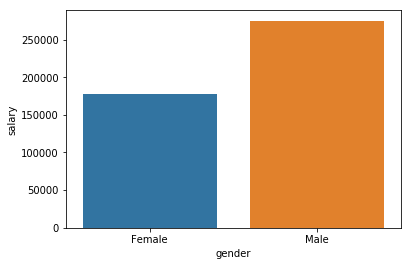

In [97]:
sns.barplot(x='gender', y='salary', data=emp, estimator=np.max, ci = 0) # then no CI here

## Multivariate numeric
We now turn to plotting two numeric variables. Scatter and line plots are the most common.

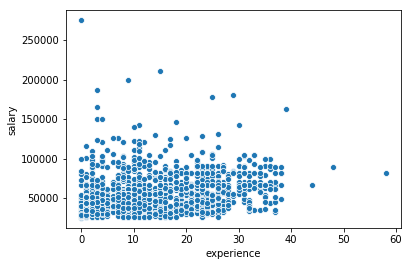

In [98]:
sns.scatterplot(x='experience', y='salary', data=emp)

The **`regplot`** function draws the regression line through the points.

/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


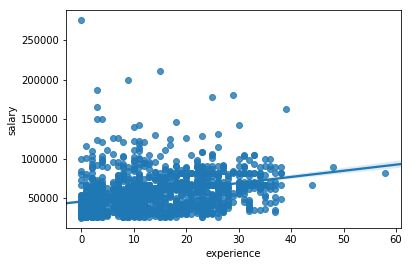

In [99]:
sns.regplot(x='experience', y='salary', data=emp) # gives regression line

# Add another dimension with `hue`
The `hue` parameter is found in most seaborn methods and allows you slice the data by one more dimension. The **`hue`** parameter does not create a new Axes, rather, it slices the data in the current Axes.

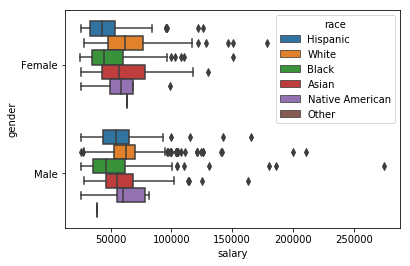

In [100]:
sns.boxplot(x='salary', y='gender', hue='race', data=emp)

/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


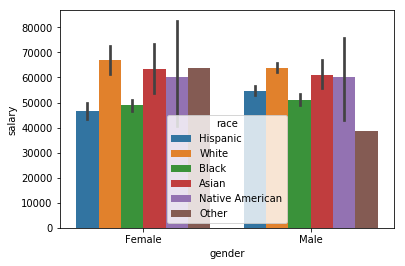

In [101]:
sns.barplot(x='gender', y='salary', hue='race', data=emp)

/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


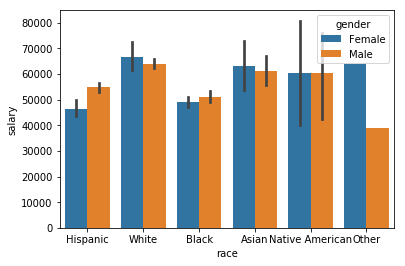

In [102]:
ax = sns.barplot(x='race', y='salary', hue='gender', data=emp)

# Add more Axes with the Grid plots
There are only a few Grid plots and for them, you will need to specify the name of the underlying Seaborn Axes plot you would like. **`catplot`** is one of the Grid plots.

#### By default, the `catplot` does a `stripplot`

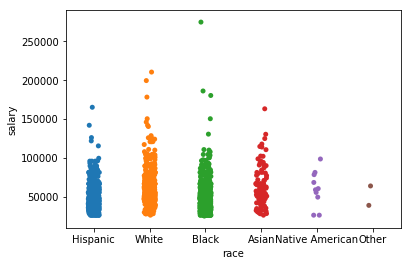

In [103]:
sns.stripplot(x='race', y='salary', data=emp)

Notice how the below plot is the same as the above.

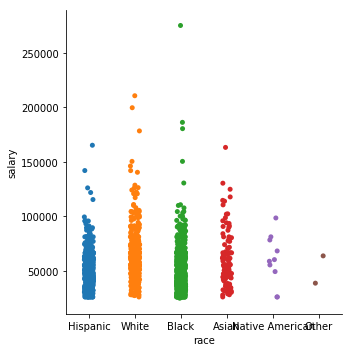

In [104]:
sns.catplot(x='race', y='salary', data=emp)

## Use `col` or `row` to create the Grid
If you plot more than one Axes with Seaborn you have created a grid. Use the **`col`** or **`rol`** parameter to specify the column you would like to slice the data with.

The following plot has 

/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


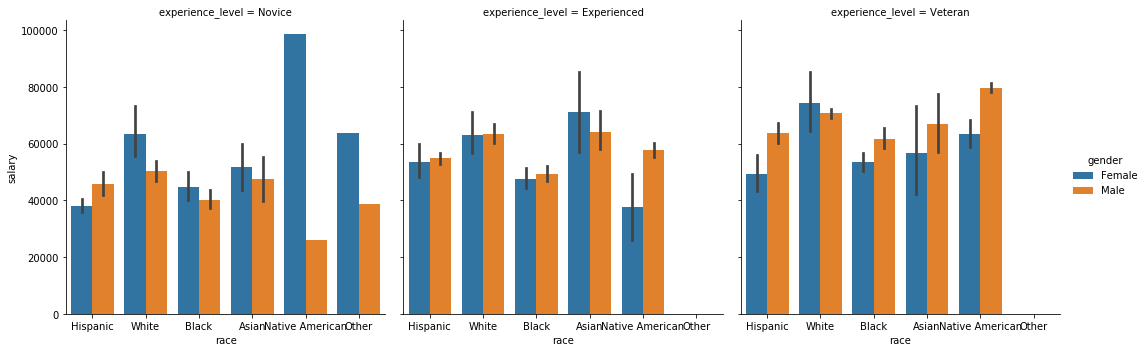

In [105]:
sns.catplot(x='race', y='salary', hue='gender', data=emp, kind='bar', col='experience_level')

## Use both `row` and `col` for maximum level of slicing
You can use the **`row`** variable as well to further slice the data. The following filters for the top 5 departments and then calculates bar plots for each combination of department, experience level, race, and gender.

In [106]:
top5 = emp['dept'].value_counts().index[:5]
filt = emp['dept'].isin(top5)
emp2 = emp[filt]

/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


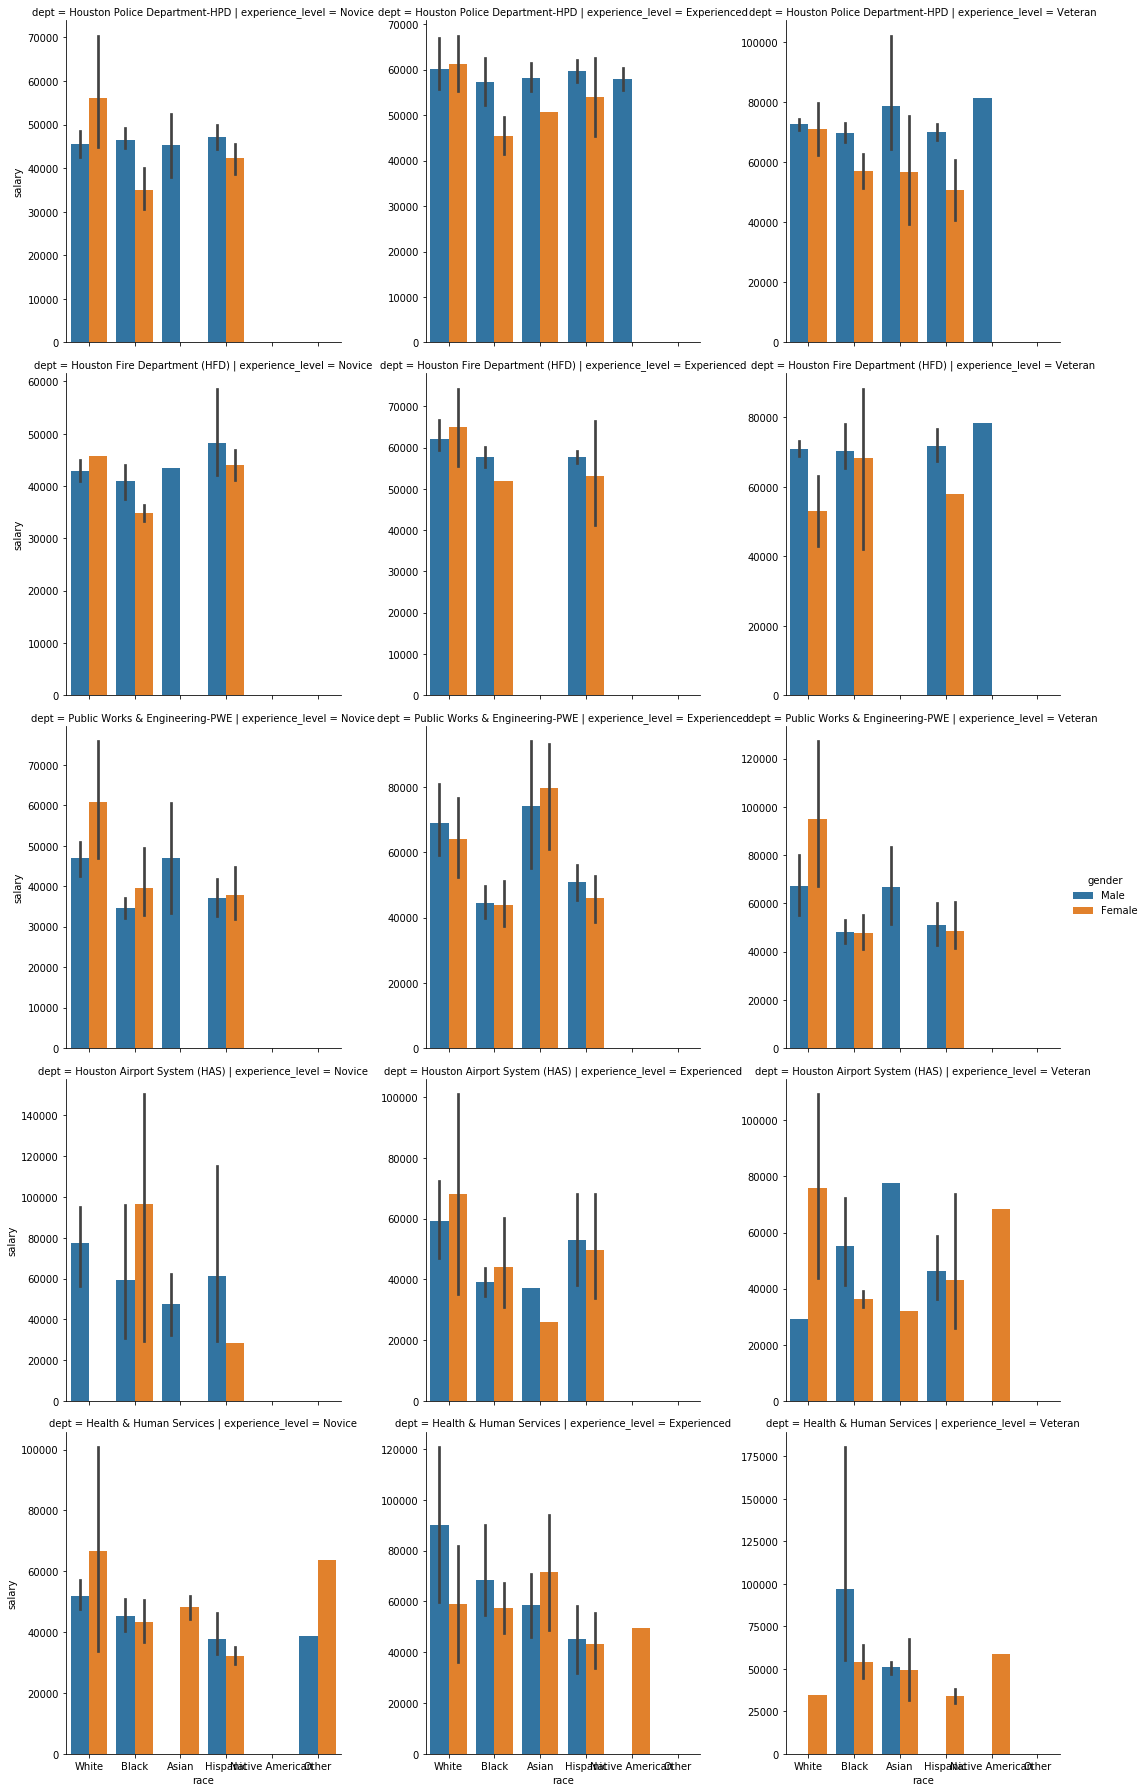

In [107]:
sns.catplot(x='race', y='salary', hue='gender', 
            data=emp2, kind='bar', col='experience_level', row='dept', sharey=False)

## Matrix plots
Let's open up the Mini Web App Finding Similar Members with the Meetup API notebook.

# Exercises

### Problem 1
<span  style="color:green; font-size:16px">Using Seaborn, plot the number of schools per state.</span>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

college = pd.read_csv('../data/college.csv')
tips = sns.load_dataset('tips')

In [109]:
college.head()

instnm        city stabbr  hbcu  menonly  \
0             Alabama A & M University      Normal     AL   1.0      0.0   
1  University of Alabama at Birmingham  Birmingham     AL   0.0      0.0   
2                   Amridge University  Montgomery     AL   0.0      0.0   
3  University of Alabama in Huntsville  Huntsville     AL   0.0      0.0   
4             Alabama State University  Montgomery     AL   1.0      0.0   

   womenonly  relaffil  satvrmid  satmtmid  distanceonly         ...          \
0        0.0         0     424.0     420.0           0.0         ...           
1        0.0         0     570.0     565.0           0.0         ...           
2        0.0         1       NaN       NaN           1.0         ...           
3        0.0         0     595.0     590.0           0.0         ...           
4        0.0         0     425.0     430.0           0.0         ...           

   ugds_2mor  ugds_nra  ugds_unkn  pptug_ef  curroper  pctpell  pctfloan  \
0     0.0000    0.0059     0.0138    0.0656         1   0.7356    0.8284   
1     0.0368    0.0179     0.0100    0.2607         1   0.3460    0.5214   
2     0.0000    0.0000     0.2715    0.4536         1   0.6801    0.7795   
3     0.0172    0.0332     0.0350    0.2146         1   0.3072    0.4596   
4     0.0098    0.0243     0.0137    0.0892         1   0.7347    0.7554   

   ug25abv  md_earn_wne_p10  grad_debt_mdn_supp  
0   0.1049            30300               33888  
1   0.2422            39700             21941.5  
2   0.8540            40100               23370  
3   0.2640            45500               24097  
4   0.1270            26600             33118.5  

[5 rows x 27 columns]

In [110]:
college.groupby('stabbr').agg({'instnm':'count'}).reset_index().head()

stabbr  instnm
0     AK      10
1     AL      96
2     AR      86
3     AS       1
4     AZ     133

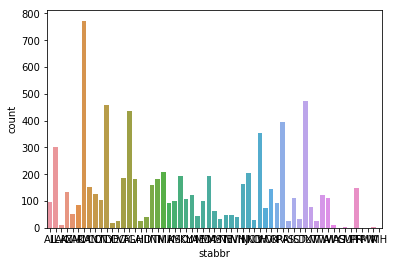

In [111]:
sns.countplot(x='stabbr', data = college)

### Problem 2
<span  style="color:green; font-size:16px">Use pandas to create the same plot from problem 1, but make it an ordered horizontal bar chart.</span>

In [112]:
# your code here
p2 = college.groupby('stabbr').agg({'instnm':'count'}).sort_values(by = 'instnm', ascending=False)
p2.head()

instnm
stabbr        
CA         773
TX         472
NY         459
FL         436
PA         394

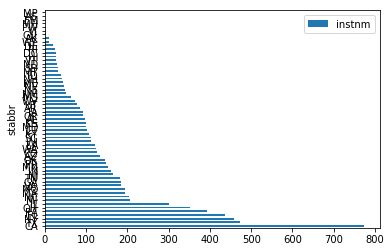

In [113]:
p2.plot(kind = 'barh')

### Problem 3
<span  style="color:green; font-size:16px">Make a boxplot per state of SAT Math.</span>

In [115]:
college.head()

instnm        city stabbr  hbcu  menonly  \
0             Alabama A & M University      Normal     AL   1.0      0.0   
1  University of Alabama at Birmingham  Birmingham     AL   0.0      0.0   
2                   Amridge University  Montgomery     AL   0.0      0.0   
3  University of Alabama in Huntsville  Huntsville     AL   0.0      0.0   
4             Alabama State University  Montgomery     AL   1.0      0.0   

   womenonly  relaffil  satvrmid  satmtmid  distanceonly         ...          \
0        0.0         0     424.0     420.0           0.0         ...           
1        0.0         0     570.0     565.0           0.0         ...           
2        0.0         1       NaN       NaN           1.0         ...           
3        0.0         0     595.0     590.0           0.0         ...           
4        0.0         0     425.0     430.0           0.0         ...           

   ugds_2mor  ugds_nra  ugds_unkn  pptug_ef  curroper  pctpell  pctfloan  \
0     0.0000    0.0059     0.0138    0.0656         1   0.7356    0.8284   
1     0.0368    0.0179     0.0100    0.2607         1   0.3460    0.5214   
2     0.0000    0.0000     0.2715    0.4536         1   0.6801    0.7795   
3     0.0172    0.0332     0.0350    0.2146         1   0.3072    0.4596   
4     0.0098    0.0243     0.0137    0.0892         1   0.7347    0.7554   

   ug25abv  md_earn_wne_p10  grad_debt_mdn_supp  
0   0.1049            30300               33888  
1   0.2422            39700             21941.5  
2   0.8540            40100               23370  
3   0.2640            45500               24097  
4   0.1270            26600             33118.5  

[5 rows x 27 columns]

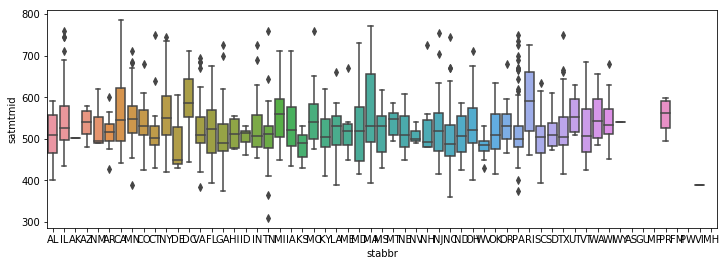

In [116]:
# your code here
#ax = sns.barplot(x='race', y='salary', hue='gender', data=emp)
ax = sns.boxplot(x = 'stabbr', y = 'satmtmid', data = college)
ax.figure.set_size_inches(12, 4)

### Problem 4
<span  style="color:green; font-size:16px">Draw the relationship between SAT Math and Verbal scores with a regression line.</span>

/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


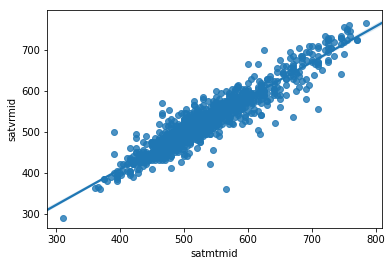

In [117]:
# your code here
#sns.regplot(x='experience', y='salary', data=emp) # gives regression line
sns.regplot(x = 'satmtmid', y = 'satvrmid', data = college)

# Ask questions that you can answer with Seaborn
Use the insurance dataset:

/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


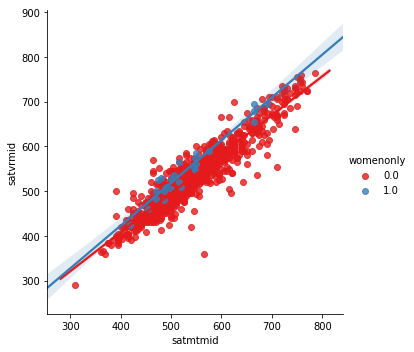

In [10]:
sns.lmplot(x = 'satmtmid', y = 'satvrmid', hue='womenonly', data = college, palette='Set1')

/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


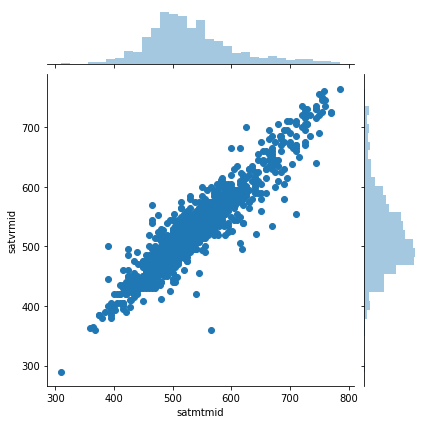

In [11]:
sns.jointplot(x="satmtmid", y="satvrmid", data=college);

/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid va

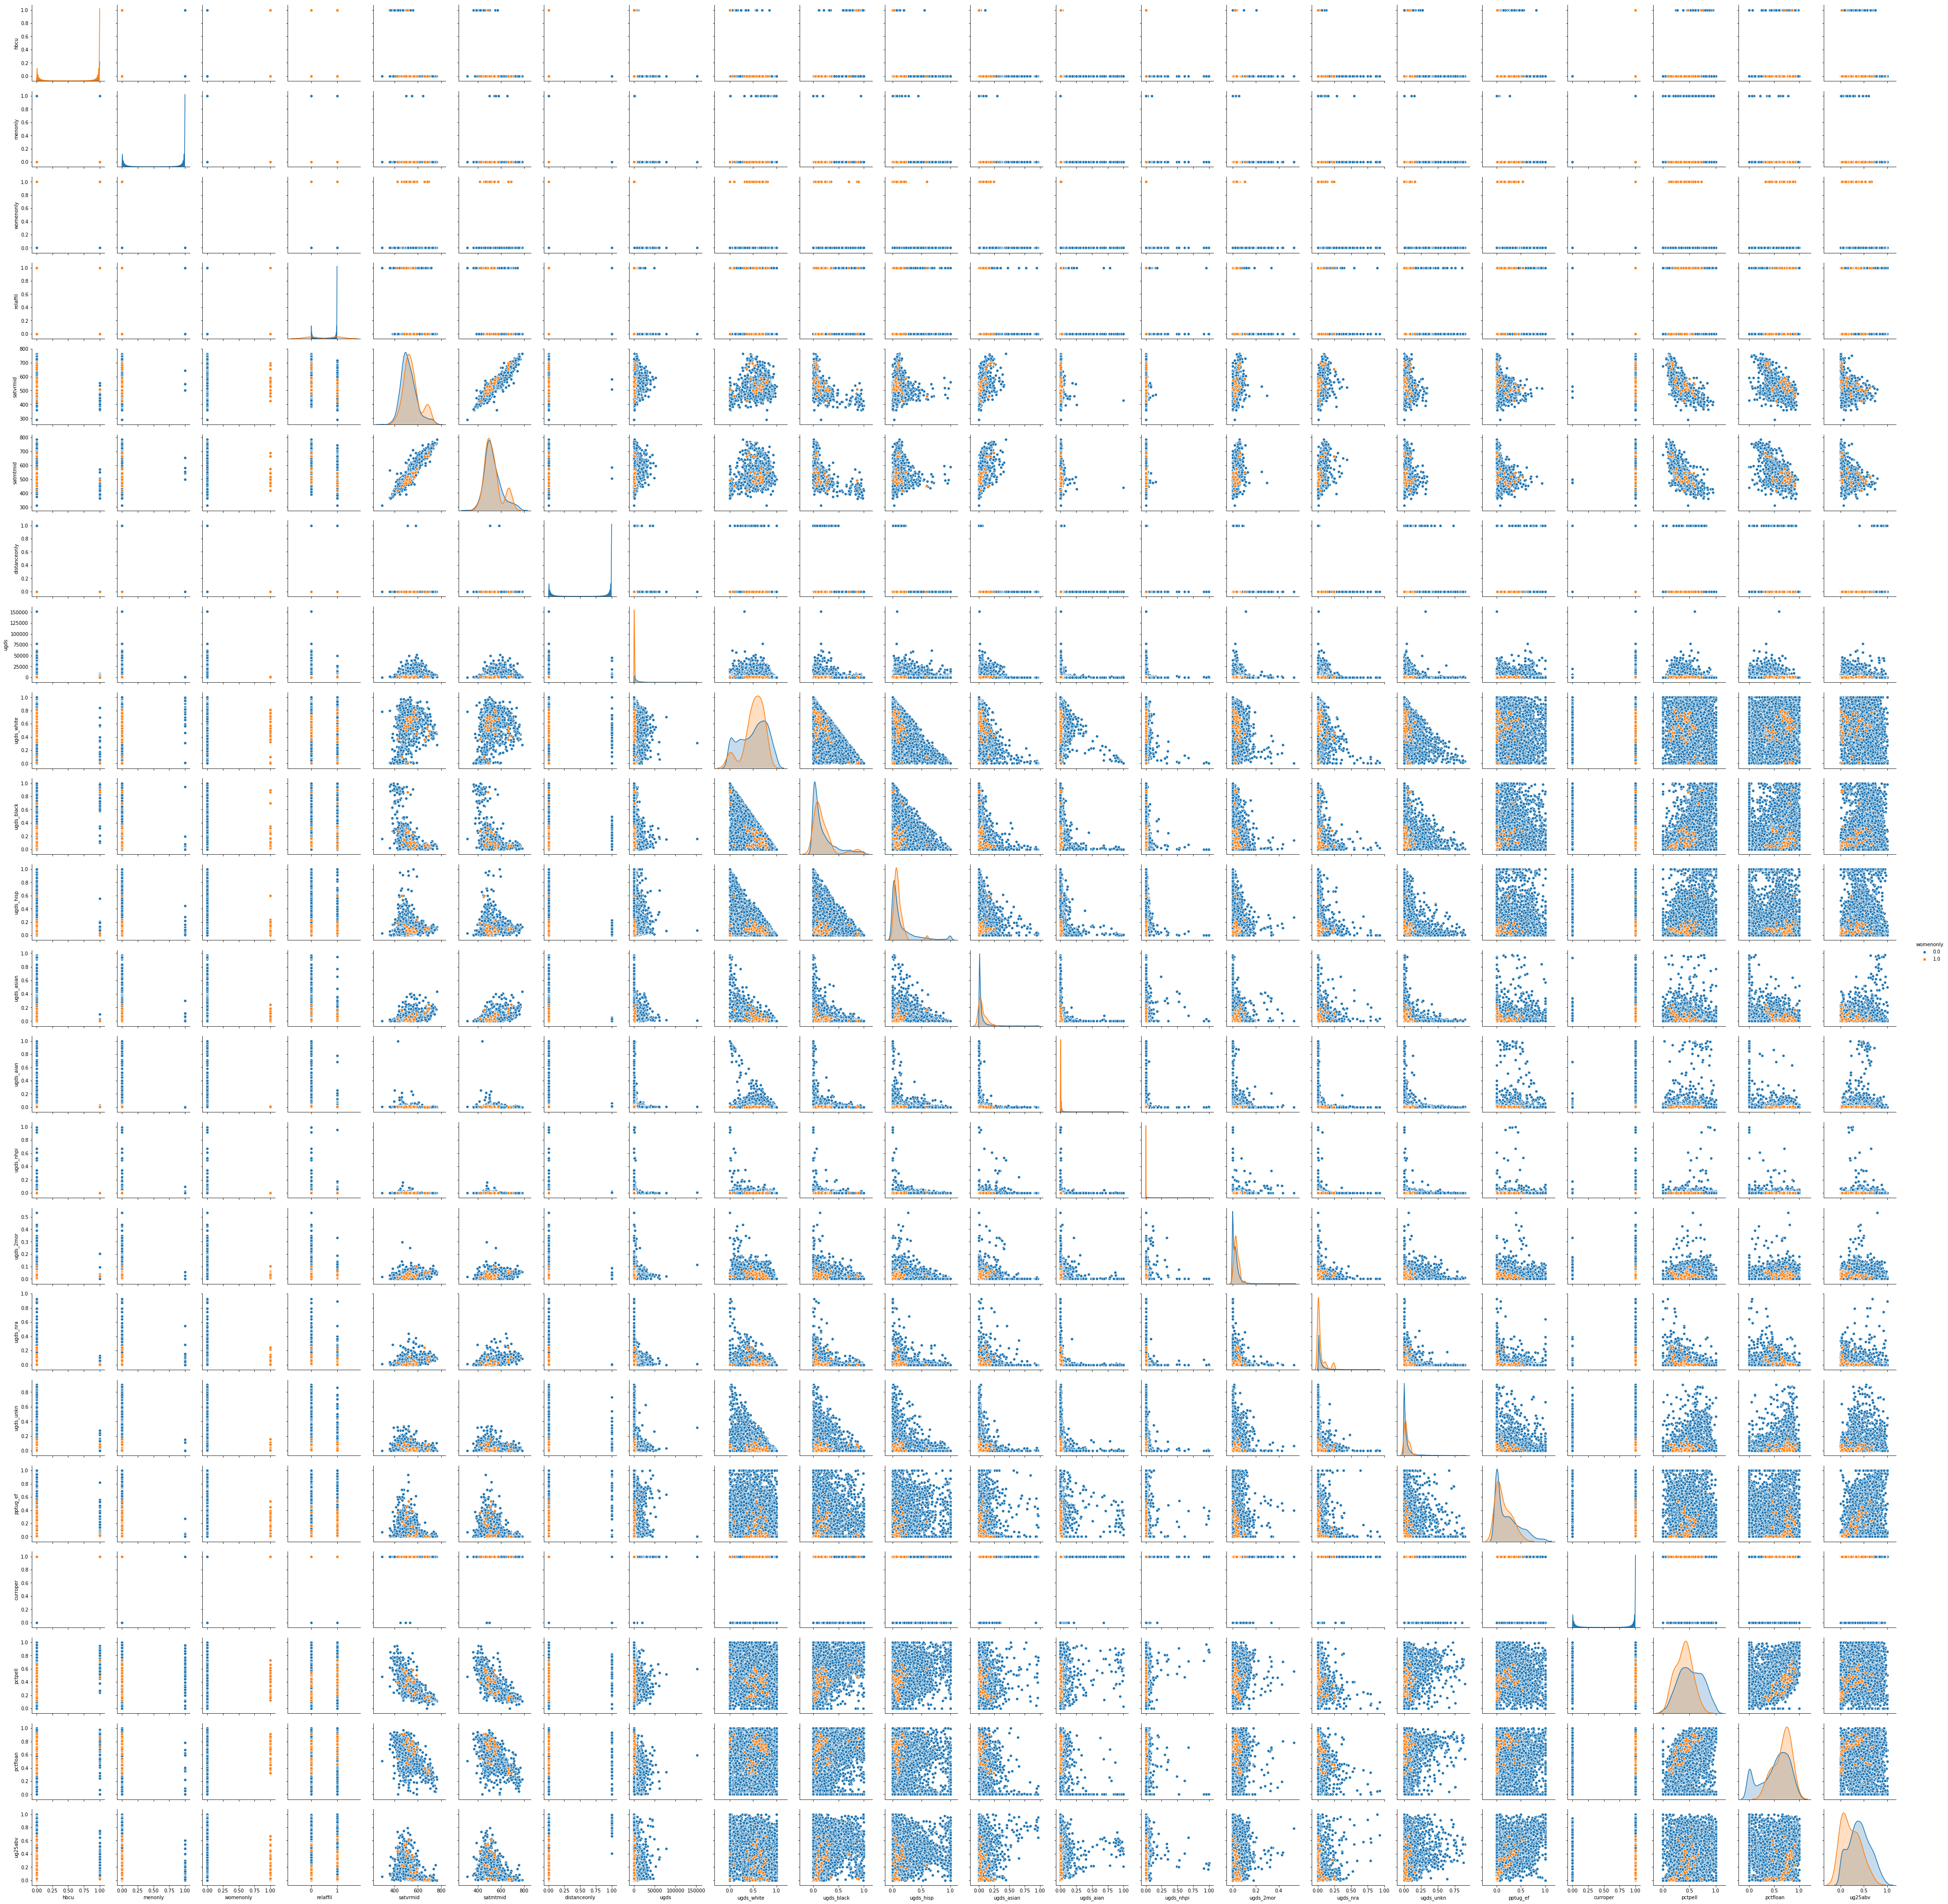

In [12]:
sns.pairplot(data=college, hue="womenonly");

In [14]:
bikes = pd.read_csv('../data/bikes.csv')
bikes.head()

trip_id    usertype gender            starttime             stoptime  \
0     7147  Subscriber   Male  2013-06-28 19:01:00  2013-06-28 19:17:00   
1     7524  Subscriber   Male  2013-06-28 22:53:00  2013-06-28 23:03:00   
2    10927  Subscriber   Male  2013-06-30 14:43:00  2013-06-30 15:01:00   
3    12907  Subscriber   Male  2013-07-01 10:05:00  2013-07-01 10:16:00   
4    13168  Subscriber   Male  2013-07-01 11:16:00  2013-07-01 11:18:00   

   tripduration             from_station_name  latitude_start  \
0           993     Lake Shore Dr & Monroe St       41.881050   
1           623  Clinton St & Washington Blvd       41.883380   
2          1040  Sheffield Ave & Kingsbury St       41.909592   
3           667       Carpenter St & Huron St       41.894556   
4           130        Damen Ave & Pierce Ave       41.909396   

   longitude_start  dpcapacity_start          to_station_name  latitude_end  \
0       -87.616970              11.0    Michigan Ave & Oak St     41.900960   
1       -87.641170              31.0     Wells St & Walton St     41.899930   
2       -87.653497              15.0  Dearborn St & Monroe St     41.881320   
3       -87.653449              19.0   Clark St & Randolph St     41.884576   
4       -87.677692              19.0   Damen Ave & Pierce Ave     41.909396   

   longitude_end  dpcapacity_end  temperature  visibility  wind_speed  \
0     -87.623777            15.0         73.9        10.0        12.7   
1     -87.634430            19.0         69.1        10.0         6.9   
2     -87.629521            23.0         73.0        10.0        16.1   
3     -87.631890            31.0         72.0        10.0        16.1   
4     -87.677692            19.0         73.0        10.0        17.3   

   precipitation        events  
0        -9999.0  mostlycloudy  
1        -9999.0  partlycloudy  
2        -9999.0  mostlycloudy  
3        -9999.0  mostlycloudy  
4        -9999.0  partlycloudy

In [21]:
bikes_pivot = bikes.groupby(["events", "gender"]).agg({'tripduration':'mean'}).reset_index()
bikes_pivot.head(2)

events  gender  tripduration
0  clear  Female    889.229955
1  clear    Male    730.481688

In [ ]:
g = sns.PairGrid(bikes)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)

/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/matplotlib/contour.py:1540: UserWarning: Warning: converting a ma

KeyboardInterrupt: 